In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [3]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [4]:
np.random.seed(42)

In [5]:
dataset = pd.read_csv("X_trains.csv", index_col=0)
X_trains = pd.DataFrame(dataset)
X_trains.head()

,PQLC2,COL9A2,AKR7A2,PTPRU,IL12RB2,BMP8B,STMN1,TXNDC12,C1orf54,FCGR1A,...,PBX3,GAS1,TDRD7,TKTL1,NXT2,FAM127A,CCNB3,RAB39B,KCNE1L,SAGE1
0,-0.298,-0.421,-0.502,-0.071,0.613,-0.164,-0.630,2.671,0.015,-0.319,...,-0.579,-0.140,0.425,-0.126,-0.029,-0.174,0.199,-0.109,-0.203,-0.142
1,1.109,-0.129,-0.024,-0.137,-0.344,-0.216,-0.695,1.814,-0.136,0.021,...,-0.250,-0.170,-0.643,-0.141,-0.489,-0.472,-0.580,-0.793,-0.109,-0.142
2,0.031,-0.380,-0.114,-0.220,-0.250,-0.243,-0.180,-0.482,0.005,-0.421,...,0.891,-0.136,0.339,-0.141,-0.124,-0.437,-0.242,-0.551,-0.203,-0.142
3,0.041,-0.156,-0.583,-0.190,-0.336,-0.251,0.886,0.269,0.333,-0.427,...,0.182,-0.121,1.175,-0.107,-0.141,-0.472,-0.356,1.571,-0.207,-0.142
4,-0.299,-0.328,-0.403,-0.010,-0.334,-0.238,0.526,-0.314,-0.595,-0.360,...,-0.699,-0.113,-0.567,-0.131,-0.346,-0.071,0.832,-0.749,0.533,-0.139


In [6]:
dataset = pd.read_csv("y_trains.csv", index_col=0)
y_trains = pd.DataFrame(dataset)
y_trains.head()

,Status
0,0
1,0
2,0
3,0
4,0


In [7]:
dataset = pd.read_csv("y_test.csv", index_col=0)
y_test = pd.DataFrame(dataset)
y_test.head()

,Status
patient,
2-041,0
16-00705,0
2-008,0
TARGET-10-PAPBES,0
TARGET-20-PASYJI,0


In [8]:
dataset = pd.read_csv("X_test.csv", index_col=0)
X_test = pd.DataFrame(dataset)
X_test.head()

,PQLC2,COL9A2,AKR7A2,PTPRU,IL12RB2,BMP8B,STMN1,TXNDC12,C1orf54,FCGR1A,...,PBX3,GAS1,TDRD7,TKTL1,NXT2,FAM127A,CCNB3,RAB39B,KCNE1L,SAGE1
0,-0.245,-0.233,-0.500,0.064,-0.325,-0.196,-0.916,0.472,0.712,0.009,...,0.306,-0.161,0.943,-0.135,-0.263,0.098,0.226,-0.906,-0.152,-0.081
1,-0.473,-0.360,-0.773,-0.190,1.442,-0.262,-0.502,-0.546,-0.101,-0.408,...,-0.571,-0.086,-0.002,-0.120,-0.515,-0.433,-0.468,0.771,-0.205,-0.138
2,-0.139,-0.394,-0.103,-0.178,0.101,-0.188,-0.343,0.019,-0.327,0.009,...,0.285,-0.148,0.781,-0.138,0.444,-0.217,-0.452,-0.094,-0.205,-0.123
3,-0.243,-0.218,0.132,-0.205,-0.339,-0.254,-0.266,-0.782,-0.291,-0.427,...,-0.502,0.022,-0.065,-0.140,1.270,0.655,-0.765,-0.189,-0.200,-0.142
4,0.536,0.506,1.306,-0.215,-0.326,-0.255,-0.817,1.281,0.494,0.187,...,-0.303,-0.167,-0.480,-0.138,-0.467,1.542,-0.765,-0.928,0.041,-0.142


# Random Forest



In [9]:
import pickle #saveModel
#grid = open('best_rf.pkl', 'wb')
#pickle.dump(best_rf, grid)
#grid.close()

#load model
grid = open('rf.pkl', 'rb')
best_rf = pickle.load(grid)
grid.close()

In [10]:
best_rf

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=775, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=775, random_state=42)

In [12]:
np.random.seed(42)
best_rf.fit(X_trains,y_trains.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=12, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=775, random_state=42)

In [13]:
from sklearn.metrics import roc_auc_score
y_pred = best_rf.fit(X_trains,y_trains.values.ravel()).predict(X_test)
roc_auc_score(y_test, y_pred)

0.8942078150521423

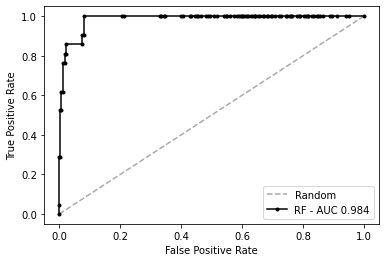

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# predict probabilities
yhat = best_rf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', color = "DarkGray")
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label="RF - AUC %1.3f" % roc_auc_score(y_test, pos_probs), color="Black")
# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
plt.savefig("roc.svg", format="svg", dpi=199, bbox_inches="tight")
# show the plot
plt.show()

In [15]:
from sklearn.dummy import DummyClassifier
# no skill model, stratified random class predictions
modeld = DummyClassifier(strategy='stratified', random_state=42)
modeld.fit(X_trains, y_trains.values.ravel())
yhatd = modeld.predict_proba(X_test)
pos_probs = yhatd[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
best_rf.fit(X_trains,  y_trains.values.ravel())
yhat = best_rf.predict_proba(X_test)
pos_probs = yhat[:,1]
# calculate roc auc
roc_auc = roc_auc_score(y_test.values.ravel(), pos_probs)
print('Random Forest ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.489
Random Forest ROC AUC 0.984


In [16]:
from sklearn.metrics import classification_report
# relatório de classificação
cr = classification_report(y_test, y_pred)
print(cr)
roc_auc = roc_auc_score(y_test.values.ravel(), pos_probs)
print('Random Forest ROC AUC %.3f' % roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       379
           1       0.68      0.81      0.74        21

    accuracy                           0.97       400
   macro avg       0.83      0.89      0.86       400
weighted avg       0.97      0.97      0.97       400

Random Forest ROC AUC 0.984


In [57]:
#function for confusion matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

     # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        acuracia  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            sensibilidade = cf[1,1]/sum(cf[1,:])
            especificidade = cf[0,0]/sum(cf[0,:])
            VPP = cf[1,1] / sum(cf[:,1])
            VPN = cf[0,0] / sum(cf[:,0])
            
            
            # f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nSensitivity={:0.3f}\nEspecificity={:0.3f}\nPPV={:0.3f}\nNPV={:0.3f}".format(
                acuracia, sensibilidade, especificidade, VPP, VPN)
        else:
            stats_text = "\n\nnAcurácia={:0.3f}".format(acuracia)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Diagnosis obtained');
        plt.xlabel('Diagnosis predicted by the model' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

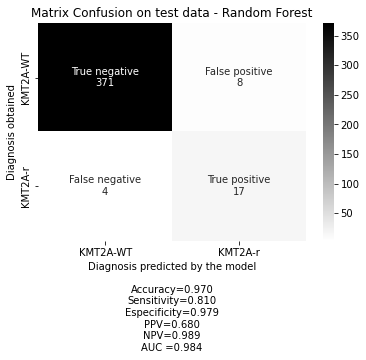

In [42]:
predictions = best_rf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = [0, 1])
labels = ['True negative','False positive','False negative', 'True positive']
diagnosticos = ['KMT2A-WT', 'KMT2A-r']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=diagnosticos, 
                       percent=False,
                          cbar=True, cmap="binary", title="Matrix Confusion on test data - Random Forest")
#plt.savefig("cm_rf.svg", format="svg", dpi=199, bbox_inches="tight")

In [20]:
import shap
# Plot the summary without showing it
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values[1], X_test, max_display = 28)


In [27]:
from  matplotlib.colors import LinearSegmentedColormap
cmap1=LinearSegmentedColormap.from_list('rg',["#357EBDFF", "#D43F3AFF"], N=10) 

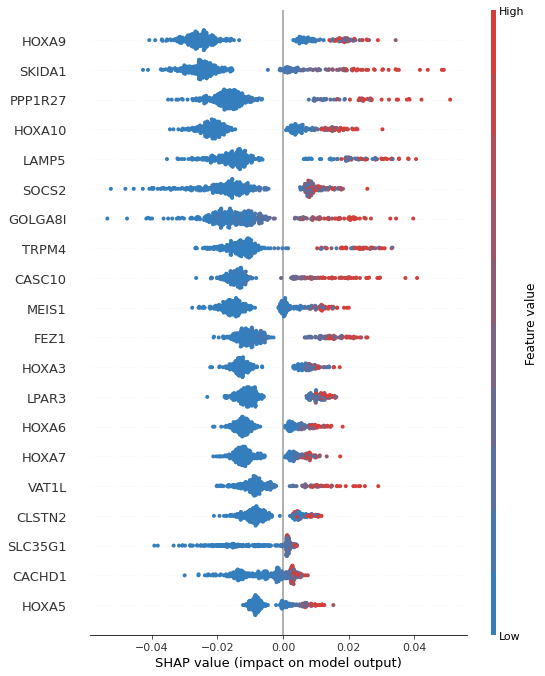

In [28]:
import matplotlib.pyplot as plt
plt.figure()
shap.summary_plot(shap_values[1], X_test, max_display = 20, show=False)


# Change the colormap
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(cmap1)
            plt.tight_layout()
            #plt.savefig("test.svg", format="svg", dpi=199, bbox_inches='tight')
       

# GBM

In [43]:
#load model
grid = open('gbm.pkl', 'rb')
gbm = pickle.load(grid)
grid.close()
gbm

LGBMClassifier(learning_rate=0.05, num_leaves=12, random_state=42)

In [44]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(learning_rate=0.05, n_estimators= 100 ,num_leaves=12, random_state=42)

In [45]:
np.random.seed(42)
gbm.fit(X_trains,y_trains.values.ravel())

LGBMClassifier(learning_rate=0.05, num_leaves=12, random_state=42)

In [46]:
from sklearn.metrics import roc_auc_score
y_pred_gbm = gbm.fit(X_trains,y_trains.values.ravel()).predict(X_test)
roc_auc_score(y_test, y_pred_gbm)

0.9405076014574695

In [53]:
from sklearn.metrics import classification_report
cr_gbm = classification_report(y_test, y_pred_gbm)
print(cr_gbm)

prob_pos = gbm.predict_proba(X_test)
prob_pos = prob_pos[:,1]
roc_auc = roc_auc_score(y_test.values.ravel(), prob_pos)
print('Random Forest ROC AUC %.3f' % roc_auc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       379
           1       0.68      0.90      0.78        21

    accuracy                           0.97       400
   macro avg       0.84      0.94      0.88       400
weighted avg       0.98      0.97      0.97       400

Random Forest ROC AUC 0.988


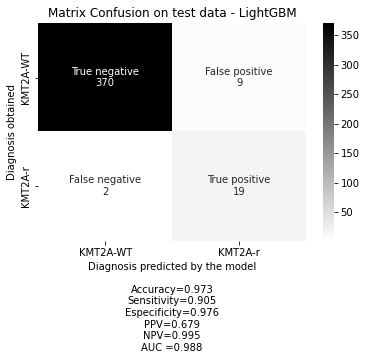

In [60]:
predictions = gbm.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = [0, 1])
labels = ['True negative','False positive','False negative', 'True positive']
diagnosticos = ['KMT2A-WT', 'KMT2A-r']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=diagnosticos, 
                       percent=False,
                          cbar=True, cmap="binary", title="Matrix Confusion on test data - LightGBM")
plt.savefig("cm_GBM247.svg", format="svg", dpi=199, bbox_inches="tight")

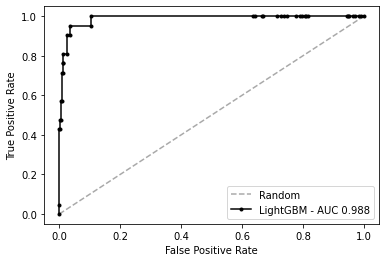

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# predict probabilities
yhat = gbm.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', color = "DarkGray")
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label="LightGBM - AUC %1.3f" % roc_auc_score(y_test, prob_pos), color="Black")
# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
plt.savefig("roc_GBM247.svg", format="svg", dpi=199, bbox_inches="tight")
# show the plot
plt.show()

In [62]:
import shap
# Plot the summary without showing it
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values[1], X_test_v, max_display = 28)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


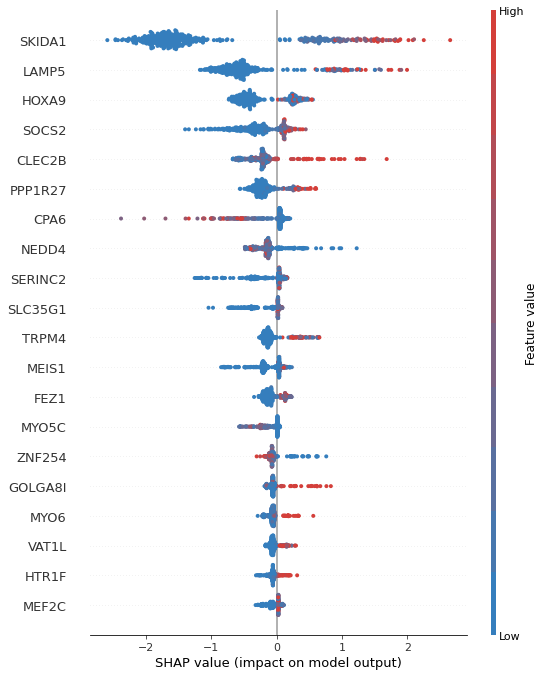

In [63]:
import matplotlib.pyplot as plt
plt.figure()
shap.summary_plot(shap_values[1], X_test, max_display = 20, show=False)
# Change the colormap
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(cmap1)
            plt.tight_layout()
            plt.savefig("shap_GBM247.svg", format="svg", dpi=199, bbox_inches="tight")